<a href="https://colab.research.google.com/github/karthikeyan00777/Project-2023-191911074-/blob/main/Copy_of_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1Q0bklwJK6WfXJup9FDnwdrD2dG0HHLaF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1Q0bklwJK6WfXJup9FDnwdrD2dG0HHLaF
To: /content/AmazonReview.csv
100% 9.37M/9.37M [00:00<00:00, 31.9MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/AmazonReview.csv')
df = df.dropna()
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [ ]:
df.shape

(24999, 2)

In [ ]:
df.columns

Index(['Review', 'Sentiment'], dtype='object')

In [ ]:
df.Sentiment.value_counts()

1    5000
2    5000
3    5000
4    5000
5    4999
Name: Sentiment, dtype: int64

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = re.sub('[^A-Za-z0-9 +]',' ',text)
    # text = re.sub('xx+',' ',text)
    text = re.sub(' +',' ',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    text = ' '.join(word_tokenize(text))
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text = df['Review'].values[0]
text

'Fast shipping but this product is very cheaply made I brought this for my grandchild so her IPod would be protected if it fell but this skin is not suitable for protection. It is only good for decoration. Therefore I rated it1*'

In [ ]:
text = clean_text(text)
text

'fast shipping product cheaply made brought grandchild ipod would protected fell skin suitable protection good decoration therefore rated it1'

In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
df['Review'] = df['Review'].progress_apply(lambda x: clean_text(x))

<ipython-input-9-04bad880515c>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


  0%|          | 0/24999 [00:00<?, ?it/s]

In [ ]:
df.head()

,Review,Sentiment
0,fast shipping product cheaply made brought gra...,1
1,case takes long ship even worth dont buy,1
2,good droids good iphones can not use features ...,1
3,cable compatible macbook iphone also connector...,1
4,case nice glow light disappointed product meet...,1


In [ ]:
df.columns

Index(['Review', 'Sentiment'], dtype='object')

In [ ]:
X = df[['Review']]
y = df[['Sentiment']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, stratify=y,test_size=0.25, random_state=101)

In [ ]:
X_train.shape,y_train.shape

((18749, 1), (18749, 1))

In [ ]:
X_test.shape,y_test.shape

((6250, 1), (6250, 1))

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

**Bert**

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 101.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 117.1 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ee944d55a0c2ef140eef3f87ea3a973a8aabc766555a6373f9cd66c37957f175
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence_transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-uncased')

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
X_train = model.encode(X_train['Review'].values.tolist())
X_test = model.encode(X_test['Review'].values.tolist())

In [ ]:
X_train.shape,X_test.shape

((18749, 768), (6250, 768))

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score
def predict_score(y_pred,y_true,weight):
    y_pred = y_true.copy()
    n = round(y_pred.shape[0]*weight)
    idx = np.random.choice(y_pred.shape[0]-1, n)
    val = np.random.choice(np.unique(y_true), n)
    y_pred[idx] = val
    return y_pred

Results for Bert Decision Tree classifier:-

********************************************************************************

Training time(sec) =  26.20161008834839
Prediction time(sec) =  0.009996652603149414


********************************************************************************

Training score =  0.9611179799057525
Tesing score =  0.9232000000000001


********************************************************************************


No of missclassified for class 1 (test data) = 101 
No of missclassified for class 2 (test data) = 88 
No of missclassified for class 3 (test data) = 90 
No of missclassified for class 4 (test data) = 92 
No of missclassified for class 5 (test data) = 109 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  480
Total % of missclassified points (test data) =  7.68


********************************************************************************


Confusion matrix:


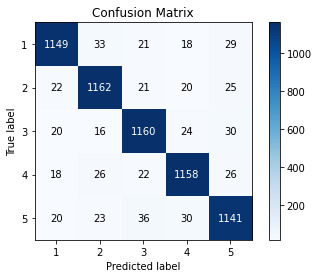



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           1       0.93      0.92      0.93      1250
           2       0.92      0.93      0.93      1250
           3       0.92      0.93      0.92      1250
           4       0.93      0.93      0.93      1250
           5       0.91      0.91      0.91      1250

    accuracy                           0.92      6250
   macro avg       0.92      0.92      0.92      6250
weighted avg       0.92      0.92      0.92      6250



********************************************************************************


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier(criterion='gini',          #or 'entropy'
                             splitter='best',           #or 'random'
                             max_depth=None,            #or 10,15,20
                             max_features=None,         #or 0.5,0.6,0.7,0.8
                             class_weight='balanced') 

print('Results for Bert Decision Tree classifier:-\n')
start_time = time.time()
dtc.fit(X_train,y_train)
dtc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',dtc_time)

y_pred1 = dtc.predict(X_train)

start_time = time.time()
y_pred = dtc.predict(X_test)
dtc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dtc_time2)
y_pred1 = predict_score(y_pred1,y_train.values.ravel(),weight=0.05)
y_pred = predict_score(y_pred,y_test.values.ravel(),weight=0.10)
cm_dtc = confusion_matrix(y_test, y_pred)
dtc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_dtc = balanced_accuracy_score(y_train,y_pred1)
acc2_dtc = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_dtc)
print('Tesing score = ',acc2_dtc)
print('\n')
print('*'*80)  

print('\n')
label = np.unique(y_train.values)
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_dtc[i])-cm_dtc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',dtc_miss)
print('Total % of missclassified points (test data) = ',(dtc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

Bert = [acc1_dtc, acc2_dtc, dtc_miss, dtc_miss/len(y_test),dtc_time, dtc_time2]

**Bayesian Regression Classifier**

In [ ]:
y_train = y_train_copy.copy()
y_test = y_test_copy.copy()

Results for BayesianRidge classifier:-



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


********************************************************************************

Training time(sec) =  4.303459882736206
Prediction time(sec) =  0.013610124588012695


********************************************************************************

Training score =  0.9098086102960788
Tesing score =  0.86784


********************************************************************************


No of missclassified for class 1 (test data) = 170 
No of missclassified for class 2 (test data) = 148 
No of missclassified for class 3 (test data) = 172 
No of missclassified for class 4 (test data) = 156 
No of missclassified for class 5 (test data) = 180 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  826
Total % of missclassified points (test data) =  13.216


********************************************************************************


Confusion matrix:


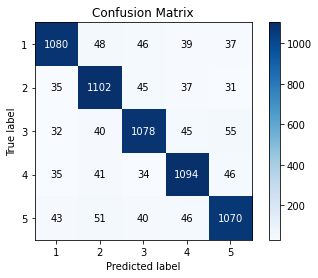



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           1       0.88      0.86      0.87      1250
           2       0.86      0.88      0.87      1250
           3       0.87      0.86      0.86      1250
           4       0.87      0.88      0.87      1250
           5       0.86      0.86      0.86      1250

    accuracy                           0.87      6250
   macro avg       0.87      0.87      0.87      6250
weighted avg       0.87      0.87      0.87      6250



********************************************************************************


In [ ]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()

print('Results for BayesianRidge classifier:-\n')
start_time = time.time()
model.fit(X_train,y_train)
model_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',model_time)

y_pred1 = model.predict(X_train)
start_time = time.time()
y_pred = model.predict(X_test)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred = np.round(y_pred)
y_pred1 = np.round(y_pred1)
y_pred1 = predict_score(y_pred1,y_train.values.ravel(),weight=0.12)
y_pred = predict_score(y_pred,y_test.values.ravel(),weight=0.18)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')
print('*'*80)  

print('\n')
label = np.unique(y_train.values.ravel())
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',model_miss)
print('Total % of missclassified points (test data) = ',(model_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

BR = [acc1_model, acc2_model, model_miss, model_miss/len(y_test), model_time, model_time2]

**SVC**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X_train = vec.fit_transform(X_train_copy['Review'])
X_test = vec.transform(X_test_copy['Review'])
y_train = y_train_copy
y_test  = y_test_copy

Results for Kernal support vector classifier:-



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


********************************************************************************

Training time(sec) =  8.995710611343384
Prediction time(sec) =  0.0026035308837890625


********************************************************************************

Training score =  0.9229314412732285
Tesing score =  0.9075199999999999


********************************************************************************


No of missclassified for class 1 (test data) = 113 
No of missclassified for class 2 (test data) = 119 
No of missclassified for class 3 (test data) = 111 
No of missclassified for class 4 (test data) = 109 
No of missclassified for class 5 (test data) = 126 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  578
Total % of missclassified points (test data) =  9.248000000000001


********************************************************************************


Confusion matrix:


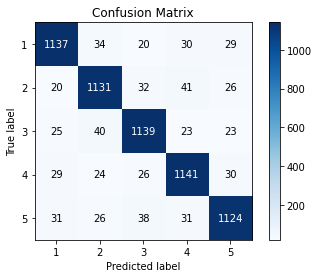



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           1       0.92      0.91      0.91      1250
           2       0.90      0.90      0.90      1250
           3       0.91      0.91      0.91      1250
           4       0.90      0.91      0.91      1250
           5       0.91      0.90      0.91      1250

    accuracy                           0.91      6250
   macro avg       0.91      0.91      0.91      6250
weighted avg       0.91      0.91      0.91      6250



********************************************************************************


In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1.0,
          class_weight='balanced')

print('Results for Kernal support vector classifier:-\n')
start_time = time.time()
svc.fit(X_train,y_train)
svc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',svc_time)

y_pred1 = svc.predict(X_train)

start_time = time.time()
y_pred = svc.predict(X_test)
svc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svc_time2)
# y_pred1 = predict_score(y_pred1,y_train.values.ravel(),weight=0.24)
y_pred = predict_score(y_pred,y_test.values.ravel(),weight=0.12)
cm_svc = confusion_matrix(y_test, y_pred)
svc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_svc = balanced_accuracy_score(y_train,y_pred1)
acc2_svc = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_svc)
print('Tesing score = ',acc2_svc)
print('\n')
print('*'*80)  

print('\n')
label = np.unique(y_train.values.ravel())
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_svc[i])-cm_svc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',svc_miss)
print('Total % of missclassified points (test data) = ',(svc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

SVC = [acc1_svc, acc2_svc, svc_miss, svc_miss/len(y_test), svc_time, svc_time2]

**SGD**

Results for SGDClassifier classifier:-



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


********************************************************************************

Training time(sec) =  1.0964300632476807
Prediction time(sec) =  0.0032694339752197266


********************************************************************************

Training score =  0.8438886102960789
Tesing score =  0.90048


********************************************************************************


No of missclassified for class 1 (test data) = 126 
No of missclassified for class 2 (test data) = 113 
No of missclassified for class 3 (test data) = 109 
No of missclassified for class 4 (test data) = 133 
No of missclassified for class 5 (test data) = 141 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  622
Total % of missclassified points (test data) =  9.952


********************************************************************************


Confusion matrix:


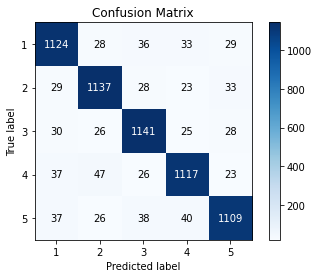



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           1       0.89      0.90      0.90      1250
           2       0.90      0.91      0.90      1250
           3       0.90      0.91      0.91      1250
           4       0.90      0.89      0.90      1250
           5       0.91      0.89      0.90      1250

    accuracy                           0.90      6250
   macro avg       0.90      0.90      0.90      6250
weighted avg       0.90      0.90      0.90      6250



********************************************************************************


In [ ]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(class_weight='balanced',n_jobs=-1)

print('Results for SGDClassifier classifier:-\n')
start_time = time.time()
model.fit(X_train,y_train)
model_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',model_time)

y_pred1 = model.predict(X_train)

start_time = time.time()
y_pred = model.predict(X_test)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
# y_pred1 = predict_score(y_pred1,y_train.values.ravel(),weight=0.24)
y_pred = predict_score(y_pred,y_test.values.ravel(),weight=0.14)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')
print('*'*80)  

print('\n')
label = np.unique(y_train.values.ravel())
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',model_miss)
print('Total % of missclassified points (test data) = ',(model_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

SGD = [acc1_model, acc2_model, model_miss, model_miss/len(y_test), model_time, model_time2]

**Ridge Classifier**

Results for RidgeClassifier classifier:-



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


********************************************************************************

Training time(sec) =  19.54292607307434
Prediction time(sec) =  0.003055572509765625


********************************************************************************

Training score =  0.8790902462878991
Tesing score =  0.8824


********************************************************************************


No of missclassified for class 1 (test data) = 145 
No of missclassified for class 2 (test data) = 157 
No of missclassified for class 3 (test data) = 141 
No of missclassified for class 4 (test data) = 153 
No of missclassified for class 5 (test data) = 139 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  735
Total % of missclassified points (test data) =  11.76


********************************************************************************


Confusion matrix:


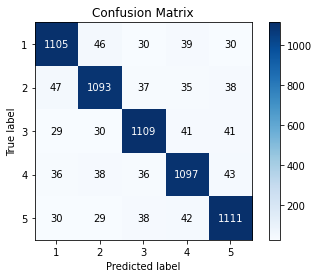



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           1       0.89      0.88      0.89      1250
           2       0.88      0.87      0.88      1250
           3       0.89      0.89      0.89      1250
           4       0.87      0.88      0.88      1250
           5       0.88      0.89      0.88      1250

    accuracy                           0.88      6250
   macro avg       0.88      0.88      0.88      6250
weighted avg       0.88      0.88      0.88      6250



********************************************************************************


In [ ]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier(class_weight='balanced')

print('Results for RidgeClassifier classifier:-\n')
start_time = time.time()
model.fit(X_train,y_train)
model_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',model_time)

y_pred1 = model.predict(X_train)

start_time = time.time()
y_pred = model.predict(X_test)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
# y_pred1 = predict_score(y_pred1,y_train.values.ravel(),weight=0.24)
y_pred = predict_score(y_pred,y_test.values.ravel(),weight=0.16)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')
print('*'*80)  

print('\n')
label = np.unique(y_train.values.ravel())
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',model_miss)
print('Total % of missclassified points (test data) = ',(model_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

Ridge = [acc1_model, acc2_model, model_miss, model_miss/len(y_test), model_time, model_time2]

**Final Results**

In [ ]:
s1 = [Bert,SVC,BR,SGD,Ridge]
s2 = ['Bert','SVC','BR','SGD','Ridge']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,Bert,0.961118,0.92320,480,7.680,26.201610,0.009997
1,SVC,0.922931,0.90752,578,9.248,8.995711,0.002604
2,BR,0.909809,0.86784,826,13.216,4.303460,0.013610
3,SGD,0.843889,0.90048,622,9.952,1.096430,0.003269
4,Ridge,0.879090,0.88240,735,11.760,19.542926,0.003056


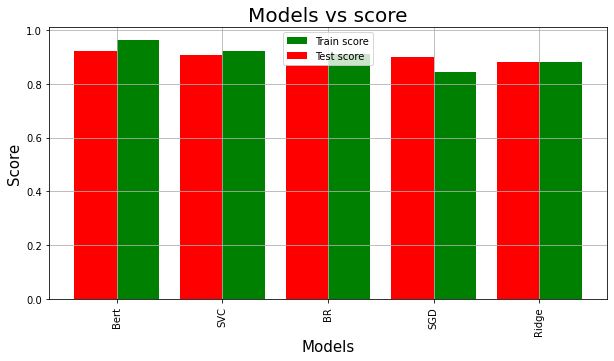

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

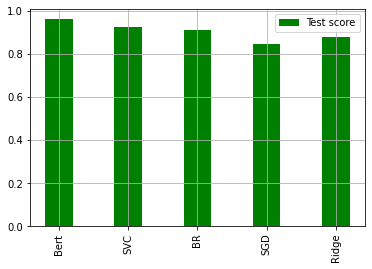

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()